Summary:

Author: Amusi

Date:  2018-08-31

Reference: 

- https://youtu.be/wQ8BIBpya2k

- https://pythonprogramming.net/introduction-deep-learning-python-tensorflow-keras/

- https://tensorflow.google.cn/guide/keras

- https://blog.csdn.net/u014061630/article/details/81086564#3-%E8%AE%AD%E7%BB%83%E5%92%8C%E8%AF%84%E4%BC%B0

Note: 建议使用TensorFlow 1.9.0及以上版本，因为从tf1.9开始，keras就已经整合到tf中了

In [1]:
import tensorflow as tf
print(tf.__version__)

1.10.0


In [2]:
mnist = tf.keras.datasets.mnist  # 28x28图像（0-9）

(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 数据归一化
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)
# print(len(x_train))

# 使用TensorFlow keras Sequential API构建全连接网络
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten()) # 全连接层
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))  # 添加一个具有128个隐藏单元全连接层，使用ReLU激活函数
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))  # 添加新的全连接层
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))# 添加Softmax层，输出单元是10（对应了MNIST的类别）

# model = tf.keras.models.Sequential([
#   tf.keras.layers.Flatten(),
#   tf.keras.layers.Dense(512, activation=tf.nn.relu),
#   tf.keras.layers.Dropout(0.2),
#   tf.keras.layers.Dense(10, activation=tf.nn.softmax)
# ])


# 模型编译
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metric=['accuracy'])

# 模型训练
model.fit(x_train, y_train, epochs=3)

Epoch 1/3
60000/60000 [==============================] - 5s 80us/step - loss: 0.2639
Epoch 2/3
60000/60000 [==============================] - 5s 87us/step - loss: 0.1048
Epoch 3/3
60000/60000 [==============================] - 6s 92us/step - loss: 0.0714


In [6]:
# 模型评估
# 一般是loss, accuracy = model.evaluate(x_test, y_test)，但不知道是tf版本问题，无法返回accuracy的值
# https://tensorflow.google.cn/api_docs/python/tf/keras/Sequential#evaluate
loss = model.evaluate(x_test, y_test)

print('val_loss: {}'.format(loss))

10000/10000 [==============================] - 0s 29us/step
val_loss: 0.09610250001596286


In [12]:
#保存为keras格式文件
model.save('my_model.h5')
 
# 模型载入
new_model = tf.keras.models.load_model('my_model.h5')

利用Netron软件，可以快速可视化上次构建并保存的模型：my_model.h5，如下图所示：

![模型可视化](simple_keras_model.png)

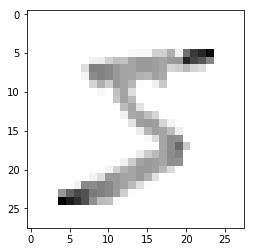

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [13]:
# 使用matplotlib可视化训练集
import matplotlib.pyplot as plt
% matplotlib inline

plt.imshow(x_train[0], cmap=plt.cm.binary)
plt.show()
print(x_train[0])

In [14]:
predictions = new_model.predict([x_test])

In [15]:
print(predictions)

[[1.7919793e-10 4.2977613e-09 1.1972882e-07 ... 9.9999571e-01
  2.0029722e-09 2.0233655e-07]
 [6.1350448e-07 2.6411552e-05 9.9992931e-01 ... 4.8980642e-08
  2.0177627e-05 1.7000193e-11]
 [2.3660866e-06 9.9684262e-01 1.0130340e-04 ... 7.3473091e-04
  2.2281501e-03 3.5404992e-06]
 ...
 [7.7371226e-08 1.0565893e-06 5.9491413e-08 ... 4.5771289e-05
  3.1136822e-06 2.4071391e-04]
 [1.2831603e-08 7.8455258e-08 5.8646932e-09 ... 5.0405464e-07
  7.7342236e-05 1.6056467e-09]
 [3.7524783e-06 4.8217800e-08 2.7270366e-07 ... 5.8775202e-09
  7.4445427e-07 3.3610090e-10]]


In [19]:
# 预测结果
import numpy as np

print(np.argmax(predictions[0]))

7


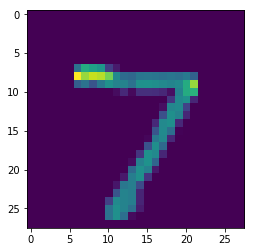

In [18]:
# 真实图像
plt.imshow(x_test[0])
plt.show()

由上述的预测结果predictions和真实图像可知，准确率还是蛮高的~